In [55]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance


In [45]:
data= pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")
print("data shape:", data.shape)
data.head()

data shape: (6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [46]:
data.isnull().values.any()

False

##### Checking the target variable
We can see that the target variable has imbalanced data, ie a very large number of label "Not Bankrupt" is recorded by far, hence working with the data as it is will cause poor performance of the model due to biasness towards one class.
I shall be addressing the problem of imbalanced data using Resampling techniques (Under and Over Sampling), fit 3 models, then based on the baseline accuracy, pick the model that has a higher accuracy score.

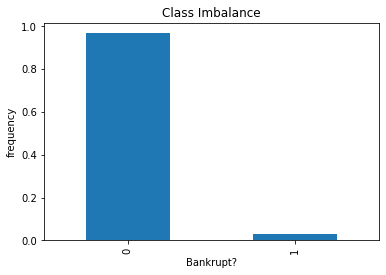

In [47]:
data["Bankrupt?"].value_counts(normalize=True).plot(kind="bar",
                                                   xlabel="Bankrupt?",
                                                   ylabel="frequency",
                                                   title="Class Imbalance");


Performing both vertical and randomized split respectively.

In [48]:
target="Bankrupt?"
X= data.drop(columns=target)
y= data[target]
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)


Performing **random over_sampling** and **random_under sampling** on the training data, respectively.
1. Over_Sampling involves duplicating the smaller class to the same size as the bigger class.
2. under_sampling involves reducing the larger class to the same size as the smaller class.

In [50]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [57]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(338, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.547409,0.597580,0.583757,0.604707,0.604707,0.999089,0.797593,0.809456,0.303629,0.781726,...,0.831586,0.001479,0.624287,0.604706,0.842928,0.279743,0.026801,0.565205,1,0.029354
1,0.575196,0.622928,0.609187,0.606142,0.606142,0.999085,0.797859,0.809654,0.304102,0.781934,...,0.845096,0.001891,0.624553,0.606139,0.843117,0.277089,0.026791,0.565159,1,0.050445
2,0.490567,0.552933,0.539483,0.629665,0.629520,0.999108,0.797607,0.809484,0.303613,0.781755,...,0.810341,0.001115,0.624214,0.629664,0.840741,0.275084,0.026791,0.565158,1,0.250781
3,0.543899,0.598779,0.593180,0.602740,0.602754,0.999041,0.797495,0.809399,0.303559,0.781664,...,0.828565,0.001621,0.623379,0.602735,0.843240,0.282201,0.026865,0.565489,1,0.023104
4,0.608980,0.658689,0.655174,0.612491,0.613183,0.999193,0.798374,0.810111,0.304774,0.782440,...,0.867959,0.010567,0.621156,0.612491,0.843773,0.275537,0.026791,0.565158,1,0.123342


##### Baseline accuracy
A baseline accuracy is a metric that acts as a reference to the machine learning problem. The score from this metric provides the required point of comparison when evaluating models (as in our case, we shall have 3 models).
**Zero Rate Classifier** is one of the baseline accuracy techniques used. It selects the majority group or predicts the most frequent class for a classification model with imbalanced data as the baseline accuracy. A model's accuracy that is higher than the baseline accuracy is considered significant or useful on a problem.
From the code below, we get a baseline accuracy of **0.97**


In [65]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline accuracy:",round(acc_baseline,2))

Baseline accuracy: 0.97


##### Fitting the 3 models, with the default hyperparameters: 
More about the default hyperparameters can be found here: [Website](https://xgboost.readthedocs.io/en/stable/parameter.html)
1. The regular model - **model_regular**
2. The Over Sampling - **model_over**
3. The Under Sampling - **model_under**

In [67]:
model_regular= XGBClassifier()
model_regular.fit(X_train, y_train)

model_over= XGBClassifier()
model_over.fit(X_train_over, y_train_over)

model_under= XGBClassifier()
model_under.fit(X_train_under, y_train_under)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

##### Evaluating the 3 models using the baseline accuracy.
We can see that among the 3  models, only the over sampling model is fairly good based on both the Training and Test accuracy scores.


In [72]:
for m in [model_over,model_under,model_regular]:
    acc_train = m.score(X_train, y_train)
    acc_test= m.score(X_test, y_test)
    
    print("Training accuracy:", round(acc_train,4))
    print("Test accuracy:", round(acc_test,2))

Training accuracy: 1.0
Test accuracy: 0.96
Training accuracy: 0.8838
Test accuracy: 0.87
Training accuracy: 1.0
Test accuracy: 0.97


##### Hyperparameter Tuning
Hyperparameter tuning is an essential part of controlling the behaviour of any Machine Learning model so that the estimated model parameters produce optimal results. There are various techniques for hyperparameter tuning and I shall be using the GridSearch Cross-Validation method or GridSearchCV.
More about hyperparameter tuning and the chosen GridSearchCV method can be found here:
1. [Website](https://www.jeremyjordan.me/hyperparameter-tuning/amp/)
2. [Website](https://shangding.medium.com/cross-validation-techniques-k-fold-cross-validation-vs-leave-one-out-cross-validation-2dcfb7d5deb3)

In [73]:
params= {
    "n_estimators":range(25,100,25),
    "max_depth":range(10,50,10)
        
        }
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

##### Performing GridSearchCV

In [75]:
model=GridSearchCV(
    estimator= model_over,
    param_grid=params,
    cv= 5,
    n_jobs=-1,
    verbose=1   
)
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                   

##### Results
From the code below, we can see that each row has different sets of hyperparameters for the model

In [81]:
cv_results= pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.387889,0.084979,0.020068,0.000933,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.989598,0.992435,0.991958,0.991958,0.993851,0.991960,0.001370,10
1,8.417624,0.088957,0.022261,0.000714,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.991489,0.993381,0.992904,0.993377,0.995270,0.993284,0.001210,6
2,11.224133,0.191261,0.027727,0.004359,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.991962,0.993853,0.992904,0.995270,0.997162,0.994230,0.001829,1
3,5.808699,0.117910,0.019849,0.000728,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.991017,0.995272,0.992431,0.991958,0.991958,0.992527,0.001447,9
4,8.995823,0.070339,0.022124,0.000378,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.991962,0.995745,0.992904,0.992431,0.993851,0.993379,0.001338,5


##### Extract the best set of hyperparameters
1. {max_depth: 10 and n_estimators : 75} is chosen as the best set
2. The average of all cv folds for a single combination of the parameters specified in the tuned_params(Best score), is 0.99
3. The best estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data is also shown.
 **The accuracy score of 0.99 beats the baseline accuracy!**


In [86]:
print("Best parameters:", model.best_params_)
print("Best score:", model.best_score_)
print("Best estimator:", model.best_estimator_)

Best parameters: {'max_depth': 10, 'n_estimators': 75}
Best score: 0.9942302918067325
Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Just by tuning the parameters

#### Building the final model using the best set of hyperparameters.


In [87]:
xgb= XGBClassifier(n_estimators=75, max_depth=10)
xgb.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

##### Extracting the feature importances or the features that have more predicting power.
Feature importance graph provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.
Feature importance scores can be used for feature selection in scikit-learn.
 

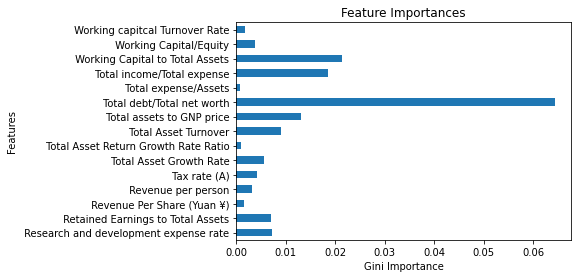

In [113]:
features= X_train_over.columns
importance= model.best_estimator_.feature_importances_
feat_imp=pd.Series(importance, index=features).sort_index()
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Feature Importances");


.